## BUSINESS UNDERSTANDING


### BUSINESS OBJECTIVES

#### PROBLEM STATEMENT
In Tanzania, water wells become non-functional due to various factors such as poor installation, pump type, or environmental conditions. Identifying wells at risk of failure can help prioritize maintenance efforts and improve water infrastructure planning. This analysis aims to develop a machine learning classifier that predicts the condition of water wells based on features like pump type, installation year, and other relevant factors. The model will categorize wells as functional or non-functional.

#### BUSINESS QUESTIONS
This project aims to answer the following questions:
1. What factors contribute most to well failures?
2. Which wells are most likely to fail in the near future?
3. Which regions have the highest concentration of non-functional wells?
4. How does the installation year affect well failure rates?
5. Is there a correlation between well failure and water quality issues?

#### EXPECTED BENEFITS
The expected benefits for this analysis is to be able to:
1. Enable the Tanzanian government to proactively prevent well failures instead of reacting.
2. Enable proactive maintenance by identifying high-risk wells.
3. Help the government target interventions in regions with high failure rates.
4. Provide insights into lifespan of wells, and help schedule replacements for aging wells before failure occurs.
5. Identify if water quality problems contribute to mechanical failures.

### BUSINESS SUCCESS CRITERIA 
1. A well-performing model (high accuracy, recall, F1-score) that correctly identifies the condition of water wells.  
2. A model that will help the government of Tanzania prioritize repairs, optimize resources, and improve well longevity.  

## DATA UNDERSTANDING

### SOURCE AND BRIEF DESCRIPTION
The source of the data sets used in this analysis are from http://taarifa.org/ and http://maji.go.tz/. They contain attributes pertaining to water points supplying clean and potable water across Tanzania. The data was split into three - training set values, test set values and training set labels - for the purpose of an online competition. For the scope of this analysis, the training set and its labels will be merged into a single dataset, allowing for greater control over the direction of the investigation. The test data will be used later to test model performance. 

### CONDITION OF THE DATA
Loading the data before checking its condition:

In [812]:
# Importing libraries
import pandas as pd
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [813]:
# Reading the datasets
label_df = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
test_df = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
train_df = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')

In [814]:
label_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [815]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [816]:
label_df.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [817]:
label_df.shape

(59400, 2)

In [818]:
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [819]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [820]:
test_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [821]:
test_df.shape

(14850, 40)

In [822]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [823]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [824]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [825]:
train_df.shape

(59400, 40)

In [826]:
train_df.columns


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

From the above, there is uniformity in the three data sets in that all have 40 columns. The columns in train_df are similar to those in test_df. Promising features that could contribute to answering our business questions include 'construction_year','extraction_type','management','water_quality' and 'quantity'. From the shapes, the initial dataset was split using the ratio 80%:20%

## DATA PREPARATION

### MERGING
We shall start by merging the train_df with its corresponding labels. This way, when we drop rows with null values, the corresponding labels will also be removed, ensuring that our data and labels remain aligned.

In [827]:
# Merging the train_df and label datasets
train_df = pd.merge(train_df, label_df, on='id')
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### DATA CLEANING

In [828]:
# From the data head, we spot some redundant columns i.e quantity and quantity group, source and source_type, waterpoint type and waterpoint type group
# To investigate this, let us narrow them down into their own dataframe
redundant_cols = ['region', 'region_code', 'district_code', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group',
                   'payment', 'payment_type','water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 
                   'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group','scheme_management', 'scheme_name']
redundant_cols_df = train_df[redundant_cols]
redundant_cols_df.head(20)

,region,region_code,district_code,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,scheme_management,scheme_name
0,Iringa,11,5,gravity,gravity,gravity,vwc,user-group,pay annually,annually,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,VWC,Roman
1,Mara,20,2,gravity,gravity,gravity,wug,user-group,never pay,never pay,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,Other,NaN
2,Manyara,21,4,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,VWC,Nyumba ya mungu pipe scheme
3,Mtwara,90,63,submersible,submersible,submersible,vwc,user-group,never pay,never pay,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,VWC,NaN
4,Kagera,18,1,gravity,gravity,gravity,other,other,never pay,never pay,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,NaN,NaN
5,Tanga,4,8,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,...,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,VWC,Zingibali
6,Shinyanga,17,3,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,...,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,VWC,NaN
7,Shinyanga,17,3,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,...,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,NaN
8,Tabora,14,6,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,...,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,VWC,NaN
9,Kagera,18,1,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,...,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,NaN


From the above, we can tell that the columns are giving pretty much the same information. Let us solidify this futher by checking the correlation between the columns

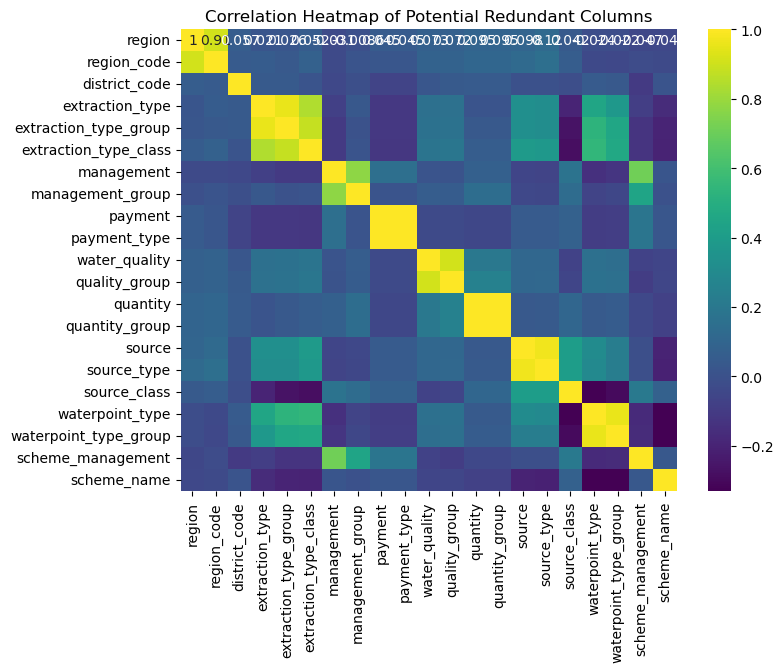

In [829]:
# Plotting a heat map
plt.figure(figsize=(8,6))
sns.heatmap(train_df[redundant_cols].apply(lambda x: pd.factorize(x)[0]).corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap of Potential Redundant Columns")
plt.show()

From the above, we can clearly tell that the suspected columns are very highly correlated with each other. We will therefore drop one of each column.

In [830]:
# Dropping duplicated columns
train_df.drop(columns=['region_code', 'district_code', 'extraction_type_group', 'extraction_type_class', 'management', 'payment', 'quality_group',
                        'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group'], inplace=True)

In [831]:
# Majority of the data in the num_private column is 0.
train_df['num_private'].value_counts()


num_private
0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: count, Length: 65, dtype: int64

In [832]:
# As a result, we will drop this column
train_df.drop(columns='num_private', inplace=True)

In [833]:
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'management_group', 'payment_type', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'status_group'],
      dtype='object')

In [834]:
# Dropping columns that will not contribute to this analysis
train_df.drop(columns=['id', 'date_recorded', 'gps_height', 'wpt_name', 'recorded_by'], inplace=True)

In [835]:
train_df.shape

(59400, 24)

In [836]:
# Checking for missing values
train_df.isnull().sum()

amount_tsh               0
funder                3637
installer             3655
longitude                0
latitude                 0
basin                    0
subvillage             371
region                   0
lga                      0
ward                     0
population               0
public_meeting        3334
scheme_management     3878
scheme_name          28810
permit                3056
construction_year        0
extraction_type          0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
dtype: int64

In [837]:
# Printing unique values for each column
for i in train_df.columns:
  print(f' Unique values for {i}')
  print(f' N-unique values for {i} is {train_df[i].nunique()}')
  print(list(train_df[i].unique())) # sort to identify duplicates within column
  print('')

 Unique values for amount_tsh
 N-unique values for amount_tsh is 98
[6000.0, 0.0, 25.0, 20.0, 200.0, 500.0, 50.0, 4000.0, 1500.0, 6.0, 250.0, 10.0, 1000.0, 100.0, 30.0, 2000.0, 400.0, 1200.0, 40.0, 300.0, 25000.0, 750.0, 5000.0, 600.0, 7200.0, 2400.0, 5.0, 3600.0, 450.0, 40000.0, 12000.0, 3000.0, 7.0, 20000.0, 2800.0, 2200.0, 70.0, 5500.0, 10000.0, 2500.0, 6500.0, 550.0, 33.0, 8000.0, 4700.0, 7000.0, 14000.0, 1300.0, 100000.0, 700.0, 1.0, 60.0, 350.0, 0.2, 35.0, 306.0, 8500.0, 117000.0, 3500.0, 520.0, 15.0, 6300.0, 9000.0, 150.0, 120000.0, 138000.0, 350000.0, 4500.0, 13000.0, 45000.0, 2.0, 15000.0, 11000.0, 50000.0, 7500.0, 16300.0, 800.0, 16000.0, 30000.0, 53.0, 5400.0, 70000.0, 250000.0, 200000.0, 26000.0, 18000.0, 26.0, 590.0, 900.0, 9.0, 1400.0, 170000.0, 220.0, 38000.0, 0.25, 12.0, 60000.0, 59.0]

 Unique values for funder
 N-unique values for funder is 1896
['Roman', 'Grumeti', 'Lottery Club', 'Unicef', 'Action In A', 'Mkinga Distric Coun', 'Dwsp', 'Rwssp', 'Wateraid', 'Isingiro 

From the above, aside from null values we can see that some columns have 'unknown' values and 'other' values. For each of these cases, we shall call these values 'unknown' for uniformity. 

In [838]:
# Replacing the values known as 'other' with 'Unknown'
train_df['scheme_name'].replace('other', 'unknown', inplace=True)
train_df['scheme_management'].replace('other', 'unknown', inplace=True)
train_df['extraction_type'].replace('other', 'unknown', inplace=True)
train_df['management_group'].replace('other', 'unknown', inplace=True)
train_df['payment_type'].replace('other', 'unknown', inplace=True)
train_df['source'].replace('other', 'unknown', inplace=True)
train_df['waterpoint_type'].replace('other', 'unknown', inplace=True)

In [839]:
# Inspecting 'funder' column
train_df['funder'].value_counts().head(10)

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: count, dtype: int64

In [840]:
# Inspecting 'installer' column
train_df['installer'].value_counts().head(10)

installer
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: count, dtype: int64

In [841]:
# Since we cannot predict unknown values for 'funder' and 'installer' column, we will fill them with 'Unknown'
train_df['funder'].fillna('Unknown', inplace=True)
train_df['installer'].fillna('Unknown', inplace=True)
train_df.isnull().sum()

amount_tsh               0
funder                   0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage             371
region                   0
lga                      0
ward                     0
population               0
public_meeting        3334
scheme_management     3878
scheme_name          28810
permit                3056
construction_year        0
extraction_type          0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
dtype: int64

In [842]:
# Inspecting 'subvillage' column
train_df['subvillage'].value_counts()

subvillage
Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: count, Length: 19287, dtype: int64

From the above, there is no subvillage that stands out as an outlier. Therefore, we cannot make any meaningful assumptions. This means that we have to drop the missing values.There is also a subvillage that has a value of 'M', which appears to be an anomaly. However, the frequency of its occurrence suggests that it may actually represent a legitimate subvillage, thus we will not remove it.

In [843]:

train_df = train_df.dropna(subset=['subvillage'])

In [844]:
# Inpecting the 'population' column
train_df['population'].value_counts()

population
0       21020
1        7024
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: count, Length: 1049, dtype: int64

We can see that a third of the data is zero for population. Therefore we will drop this column.

In [845]:
# Dropping the 'population' column
train_df.drop(columns='population', inplace=True)

In [846]:
# Inspecting 'public_meeting' column
train_df['public_meeting'].value_counts()

public_meeting
True     50642
False     5054
Name: count, dtype: int64

In [847]:
# 'public_meeting' is a boolean column heavily dominated by True. Since we can not accurately predict unknown values, we will drop the missing values
train_df = train_df.dropna(subset=['public_meeting'])

In [848]:
# Inspecting 'scheme_management' column
train_df['scheme_management'].value_counts()

scheme_management
VWC                 35207
WUG                  4392
Water authority      3124
WUA                  2862
Water Board          2709
Parastatal           1468
Company              1057
Private operator      817
Other                 434
SWC                    97
Trust                  72
Name: count, dtype: int64

In [849]:
# Inspecting 'scheme_name' column
train_df['scheme_name'].value_counts()

scheme_name
K                                  676
Borehole                           546
Chalinze wate                      404
M                                  345
Ngana water supplied scheme        270
                                  ... 
Magula Mwanyumba                     1
Jumwia ya wa tumia maji Vumamti      1
Bl Aziz water supply                 1
Mtikanga supply scheme               1
Mtawanya                             1
Name: count, Length: 2616, dtype: int64

In [850]:
# Since we cannot predict unknown values for 'scheme_name' and 'scheme_management' column, we will fill them with 'Unknown'
train_df['scheme_name'].fillna('unknown', inplace=True)
train_df['scheme_management'].fillna('unknown', inplace=True)
train_df.isnull().sum()

amount_tsh              0
funder                  0
installer               0
longitude               0
latitude                0
basin                   0
subvillage              0
region                  0
lga                     0
ward                    0
public_meeting          0
scheme_management       0
scheme_name             0
permit               2785
construction_year       0
extraction_type         0
management_group        0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
dtype: int64

In [851]:
# Inspecting 'permit' column
train_df['permit'].value_counts()

permit
True     36996
False    15915
Name: count, dtype: int64

In [852]:
# Since 'permit' is a boolean column, we can not accurately predict unknown values. Therefore, we will drop the missing values
train_df = train_df.dropna(subset=['permit'])

In [853]:
# Inspecting 'quality' column
train_df['water_quality'].value_counts()

water_quality
soft                  46013
salty                  4164
unknown                1087
milky                   733
coloured                478
salty abandoned         237
fluoride                183
fluoride abandoned       16
Name: count, dtype: int64

In [854]:
# Combining salty and salty abandoned, and fluoride and fluoride abandoned
train_df['water_quality'] = train_df['water_quality'].replace(['salty', 'salty abandoned'], 'salty')
train_df['water_quality'] = train_df['water_quality'].replace(['fluoride', 'fluoride abandoned'], 'fluoride')
train_df['water_quality'].value_counts()

water_quality
soft        46013
salty        4401
unknown      1087
milky         733
coloured      478
fluoride      199
Name: count, dtype: int64

In [855]:
train_df.isnull().sum()

amount_tsh           0
funder               0
installer            0
longitude            0
latitude             0
basin                0
subvillage           0
region               0
lga                  0
ward                 0
public_meeting       0
scheme_management    0
scheme_name          0
permit               0
construction_year    0
extraction_type      0
management_group     0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
dtype: int64

There are no more missing values.

In [856]:
train_df.shape

# We lost 10% of the data by dropping the missing values while cleaning.

(52911, 23)

In [857]:
# Checking for duplicates
train_df.duplicated().sum()

114

In [858]:
# Listing the duplicated rows
train_df[train_df.duplicated(keep=False)]

,amount_tsh,funder,installer,longitude,latitude,basin,subvillage,region,lga,ward,...,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,waterpoint_type,status_group
168,0.0,Wvt,WVT,0.000000,-2.000000e-08,Lake Victoria,Ilula,Shinyanga,Bariadi,Chinamili,...,False,0,gravity,parastatal,unknown,soft,seasonal,rainwater harvesting,communal standpipe,functional
301,0.0,Government Of Tanzania,Government,0.000000,-2.000000e-08,Lake Victoria,Nyanza,Mwanza,Geita,Kalangalala,...,True,0,afridev,user-group,never pay,soft,insufficient,machine dbh,hand pump,functional
326,0.0,Government Of Tanzania,Government,0.000000,-2.000000e-08,Lake Victoria,Nyanza,Mwanza,Geita,Kalangalala,...,True,0,submersible,user-group,never pay,soft,insufficient,machine dbh,communal standpipe,functional
370,0.0,Government Of Tanzania,Government,0.000000,-2.000000e-08,Lake Victoria,Nyanza,Mwanza,Geita,Kalangalala,...,True,0,submersible,user-group,never pay,soft,insufficient,machine dbh,communal standpipe,functional
965,0.0,Government Of Tanzania,DWE,0.000000,-2.000000e-08,Lake Victoria,K/Center,Mwanza,Geita,Katoro,...,True,0,submersible,user-group,never pay,soft,insufficient,machine dbh,communal standpipe multiple,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56899,0.0,Government Of Tanzania,Government,0.000000,-2.000000e-08,Lake Victoria,Sweya,Mwanza,Geita,Kharumwa,...,True,0,ksb,user-group,unknown,unknown,dry,lake,communal standpipe,non functional
57285,0.0,Hesawa,DWE,0.000000,-2.000000e-08,Lake Tanganyika,Sozibuye,Mwanza,Geita,Busanda,...,True,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,hand pump,functional
57423,0.0,W.D & I.,RWE,37.540901,-6.959749e+00,Wami / Ruvu,Majengo,Morogoro,Mvomero,Mlali,...,True,1968,gravity,user-group,never pay,soft,enough,river,communal standpipe,non functional
57807,0.0,Government Of Tanzania,Government,0.000000,-2.000000e-08,Lake Victoria,C/Center,Mwanza,Geita,Nyachiluluma,...,True,0,ksb,user-group,never pay,unknown,dry,lake,communal standpipe multiple,non functional


From the above, we can see that the data are near duplicates and not necessarily exact duplicates. To eliminate redundancy, we shall drop the duplicated values

In [859]:
train_df = train_df.drop_duplicates()
train_df.shape

(52797, 23)

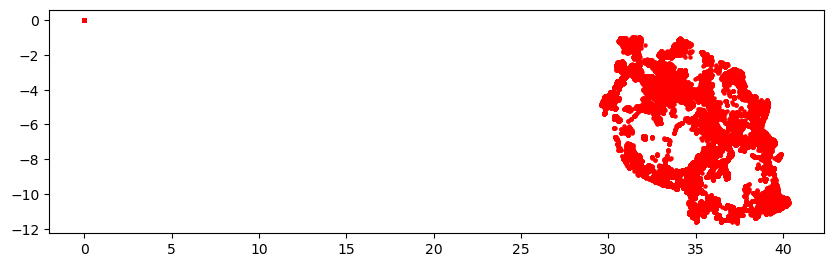

In [860]:
# Checking for outliers in the Longitude and Latitude columns
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(train_df, geometry=gpd.points_from_xy(train_df.longitude, train_df.latitude))
# Plot
gdf.plot(figsize=(10,6), marker='o', color='red', markersize=5)
plt.show()


We can see that there is an outlier with coordinates 0,0. We can remove this point.

In [861]:
# Dropping columns with latitude and longitude = 0
train_df = train_df[train_df['latitude'] != 0]
train_df = train_df[train_df['longitude'] != 0]
train_df.shape

(51434, 23)

In [862]:
# Checking for outliers in the construction year column
train_df['construction_year'].value_counts().sort_index().head()

construction_year
0       16764
1960       38
1961       20
1962       28
1963       84
Name: count, dtype: int64

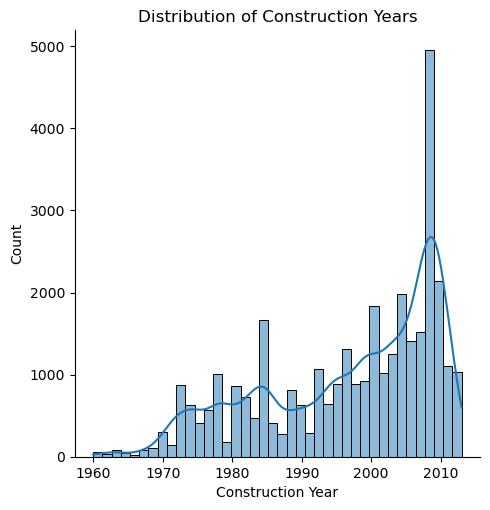

In [863]:
# Checking on the distribution of the construction years excluding year 0
construction_year_df = train_df[train_df['construction_year'] != 0]
sns.displot(construction_year_df['construction_year'], kde=True)
plt.xlabel('Construction Year')
plt.title('Distribution of Construction Years')
plt.show()

Since almost 30% of the data in the construction_year column are 0, replacing the zero values with a single value like median or mode will significantly shift the distribution of the dataset. We shall prioritize the distribution of the data by random sampling from the non-zero values. 

In [864]:
# Filtering out non-zero construction years
non_zero_years = train_df[train_df['construction_year'] > 0]['construction_year']
# Randomly sampling replacement from non-zero construction years and replacing zero values with them
train_df.loc[train_df['construction_year'] == 0, 'construction_year'] = np.random.choice(non_zero_years, size=(train_df['construction_year'] == 0).sum(), replace=True)


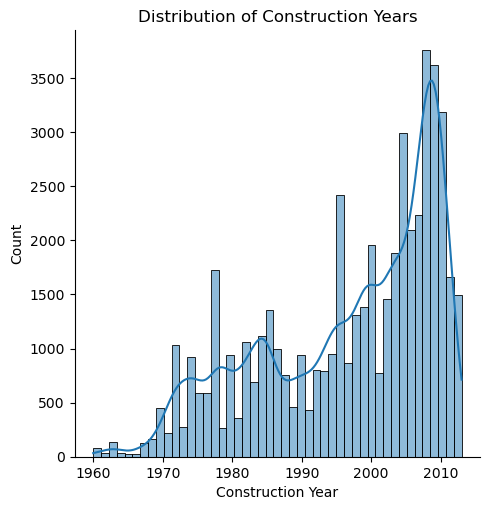

In [865]:
# Checking on the distribution of the construction years after replacement
sns.displot(train_df['construction_year'], kde=True)
plt.xlabel('Construction Year')
plt.title('Distribution of Construction Years')
plt.show()


From the graph, we have been able to maintain the distribution of the original dataset without dropping any values.

In [866]:
# investigating the distribution of the amount_tsh column
train_df['amount_tsh'].value_counts().sort_index()

amount_tsh
0.0         34582
0.2             3
1.0             3
2.0            13
5.0           375
            ...  
117000.0        7
138000.0        1
170000.0        1
200000.0        1
250000.0        1
Name: count, Length: 91, dtype: int64

The column amount_tsh has a lot of zero values, which doesnt make sense. We will replace the 0s with the mode of the entire dataset, as the mode represents what well construction usually costs.

In [867]:
# First calculating the mode for amount_tsh excluding zeros
mode_amount_tsh = train_df[train_df['amount_tsh'] != 0]['amount_tsh'].mode()[0]
mode_count = (train_df['amount_tsh'] == mode_amount_tsh).sum()
print(f"Mode Value: {mode_amount_tsh}, Count: {mode_count}")

Mode Value: 500.0, Count: 3028


In [868]:
# Replacing zeros with the mode
train_df['amount_tsh'] = train_df['amount_tsh'].replace(0, mode_amount_tsh)

### EXPLORATORY DATA ANALYSIS

In [869]:
# Combining the functional and functional needs repair values in the status_group to get a binary target variable
train_df['status_group'] = train_df['status_group'].replace(['functional needs repair', 'functional'], 'functional')
train_df['status_group'].value_counts()

status_group
functional        31735
non functional    19699
Name: count, dtype: int64

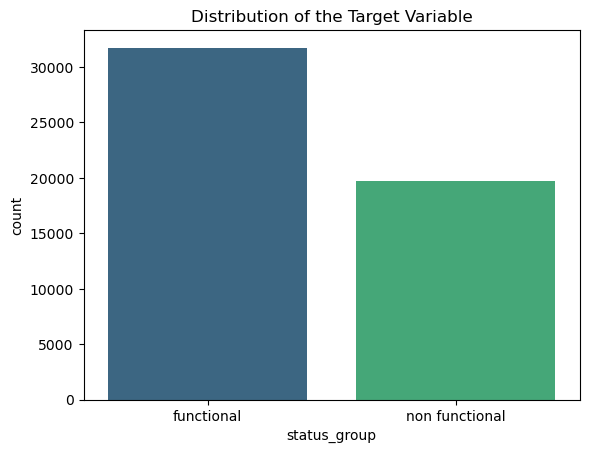

In [870]:
# Using a bar graph, we can check the distribution of the target variable
sns.countplot(x='status_group', data=train_df, palette='viridis')
plt.title('Distribution of the Target Variable')
plt.show()


The majority of the wells are functional, with a distribution of approximately 3:2 between functional and non-functional wells.

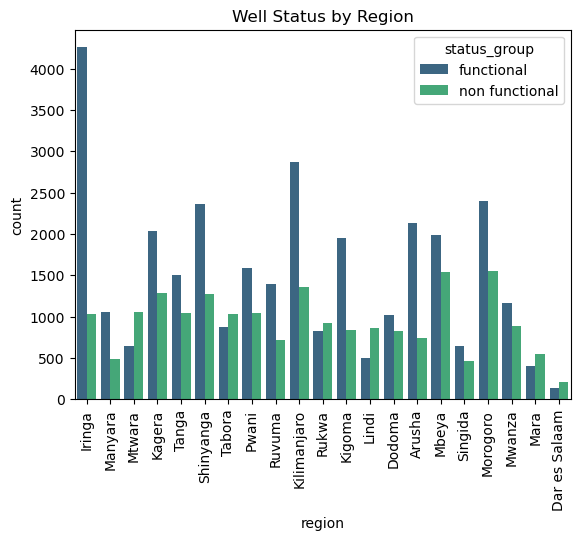

In [871]:
sns.countplot(data=train_df, x='region', hue='status_group', palette='viridis')
plt.xticks(rotation=90)
plt.title('Well Status by Region')
plt.show()


We can see that Iringa has the highest number of functioning wells followed by Kilimanjaro then Shinyanga. The highest number of non-functional wells are in Morogoro and Mbeya.

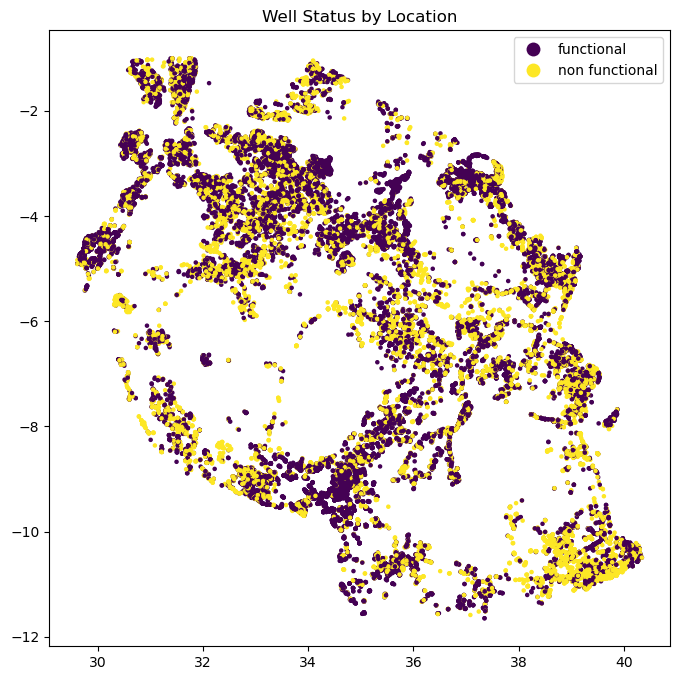

In [872]:
# Checking the map again and adding hue for status_group
gdf = gpd.GeoDataFrame(train_df, geometry=gpd.points_from_xy(train_df.longitude, train_df.latitude))
gdf.plot(figsize=(10,8), marker='o', column='status_group', cmap='viridis', legend=True, markersize=5)
plt.title('Well Status by Location')
plt.show()

This shows the data in the shape of Tanzania! The plot shows the distribution of wells based on the target variable. We can see a very even distribution throughout. We can also spot some areas in the map that do not have wells.

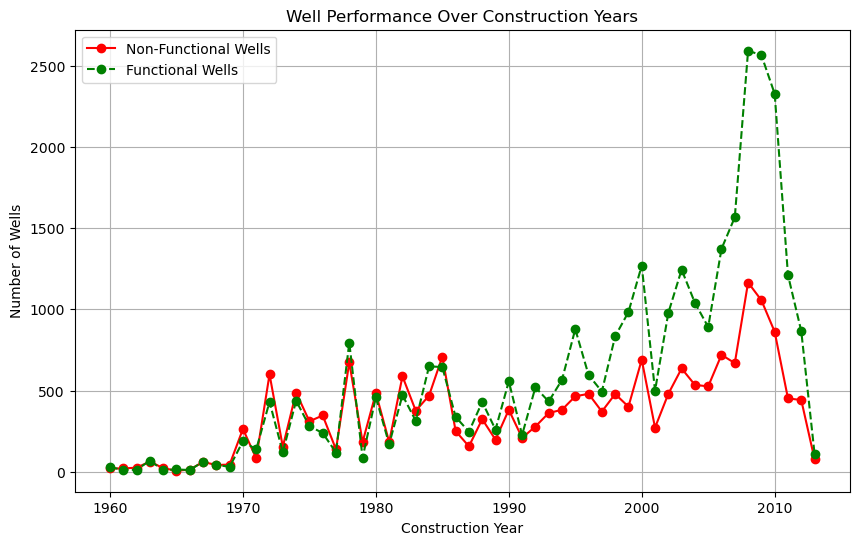

In [873]:
# Checking the trend of well performance over time
# Filter by status group
non_functional_wells_per_year = train_df[train_df['status_group'] == 'non functional'].groupby('construction_year').size()
functional_wells_per_year = train_df[train_df['status_group'] == 'functional'].groupby('construction_year').size()

# Plotting a line graph
plt.figure(figsize=(10,6))
plt.plot(non_functional_wells_per_year.index, non_functional_wells_per_year.values, marker='o', linestyle='-', color='red', label='Non-Functional Wells')
plt.plot(functional_wells_per_year.index, functional_wells_per_year.values, marker='o', linestyle='--', color='green', label='Functional Wells')
plt.xlabel('Construction Year')
plt.ylabel('Number of Wells')
plt.title('Well Performance Over Construction Years')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



The plot shows an increasing trend in well construction, peaking around 2010, with functional wells consistently outnumbering non-functional ones. However, well failures rise over time, possibly due to aging infrastructure or maintenance issues.

## PRE-PROCESSING

For this section, we shall first split the data then apply the pre-processing on both the training and testing data sets

### ENCODING AND TRANSFORMING

In [874]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = train_df.drop(columns=['status_group'])  
y = train_df['status_group']  

# Split into training and test sets (80% train, 20% test). Stratify by y keeps the distribution of y in both sets the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [875]:
# Creating a copy of the data sets
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

In [876]:
# Creating a dataframe with the numeric cols and the categorical columns
number_columns = X_train_encoded.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train_encoded.select_dtypes(exclude=np.number).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Number columns:", number_columns)

Categorical columns: ['funder', 'installer', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'management_group', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type']
Number columns: ['amount_tsh', 'longitude', 'latitude', 'construction_year']


In [877]:
# Checking for unique values in each categorical column
for i in categorical_cols:
  print(f'The variable "{i}" has {X_train_encoded[i].nunique()} variables \n')

The variable "funder" has 1523 variables 

The variable "installer" has 1672 variables 

The variable "basin" has 9 variables 

The variable "subvillage" has 15246 variables 

The variable "region" has 21 variables 

The variable "lga" has 119 variables 

The variable "ward" has 1897 variables 

The variable "public_meeting" has 2 variables 

The variable "scheme_management" has 12 variables 

The variable "scheme_name" has 2412 variables 

The variable "permit" has 2 variables 

The variable "extraction_type" has 18 variables 

The variable "management_group" has 4 variables 

The variable "payment_type" has 6 variables 

The variable "water_quality" has 6 variables 

The variable "quantity" has 5 variables 

The variable "source" has 9 variables 

The variable "waterpoint_type" has 7 variables 



In [878]:
# Dropping columns due to high cardinality
X_train_encoded.drop(columns=['funder', 'installer', 'subvillage', 'lga', 'ward', 'scheme_name'], inplace=True)
X_test_encoded.drop(columns=['funder', 'installer', 'subvillage', 'lga', 'ward', 'scheme_name'], inplace=True)

In [879]:
# Re-defining categorical columns
categorical_cols = X_train_encoded.select_dtypes(exclude=np.number).columns.tolist()

In [880]:
for i in categorical_cols:
  print(f'The variable "{i}" has {X_train_encoded[i].nunique()} variables: {X_train_encoded[i].unique()} \n')

The variable "basin" has 9 variables: ['Internal' 'Rufiji' 'Ruvuma / Southern Coast' 'Pangani' 'Lake Rukwa'
 'Wami / Ruvu' 'Lake Victoria' 'Lake Nyasa' 'Lake Tanganyika'] 

The variable "region" has 21 variables: ['Manyara' 'Iringa' 'Ruvuma' 'Tanga' 'Rukwa' 'Morogoro' 'Kagera'
 'Kilimanjaro' 'Mara' 'Shinyanga' 'Lindi' 'Mbeya' 'Kigoma' 'Mtwara'
 'Pwani' 'Singida' 'Arusha' 'Dodoma' 'Tabora' 'Mwanza' 'Dar es Salaam'] 

The variable "public_meeting" has 2 variables: [True False] 

The variable "scheme_management" has 12 variables: ['unknown' 'VWC' 'Water Board' 'Parastatal' 'WUG' 'Water authority'
 'Company' 'Private operator' 'WUA' 'Other' 'SWC' 'Trust'] 

The variable "permit" has 2 variables: [True False] 

The variable "extraction_type" has 18 variables: ['gravity' 'swn 80' 'india mark ii' 'ksb' 'unknown' 'walimi' 'nira/tanira'
 'submersible' 'mono' 'windmill' 'climax' 'afridev' 'india mark iii'
 'other - rope pump' 'other - swn 81' 'cemo' 'other - play pump'
 'other - mkulima/shinyang

Encoding the categorical variables using one-hot, ordinal, frquency and label encoding.

In [881]:
# Using One Hot Encoding for low cardinality nominal data
from sklearn.preprocessing import OneHotEncoder

ohe_cols = ['public_meeting', 'permit', 'payment_type', 'quantity', 'source', 'waterpoint_type', 'management_group']

# Initialize OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit on training data and transform both train & test
encoded_ohe_train = ohe.fit_transform(X_train_encoded[ohe_cols])
encoded_ohe_test = ohe.transform(X_test_encoded[ohe_cols])

# Convert to DataFrame and set correct column names
encoded_ohe_train_df = pd.DataFrame(encoded_ohe_train, columns=ohe.get_feature_names_out(ohe_cols), index=X_train_encoded.index)
encoded_ohe_test_df = pd.DataFrame(encoded_ohe_test, columns=ohe.get_feature_names_out(ohe_cols), index=X_test_encoded.index)

# Drop original categorical columns
X_train_encoded.drop(columns=ohe_cols, inplace=True)
X_test_encoded.drop(columns=ohe_cols, inplace=True)

# Concatenation the new encoded columns
X_train_encoded = pd.concat([X_train_encoded, encoded_ohe_train_df], axis=1)
X_test_encoded = pd.concat([X_test_encoded, encoded_ohe_test_df], axis=1)


In [882]:
# Using Ordinal Encoding for ordered categories
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['water_quality']
quality_order = [['soft', 'milky', 'salty', 'coloured', 'fluoride', 'unknown']]

# Initializing the encoder
ordinal_enc = OrdinalEncoder(categories=quality_order)

# Transform both train and test data
X_train_encoded[ordinal_cols] = ordinal_enc.fit_transform(X_train_encoded[ordinal_cols])
X_test_encoded[ordinal_cols] = ordinal_enc.transform(X_test_encoded[ordinal_cols])  # Use transform, NOT fit_transform

# Ensure dtype is preserved (as OrdinalEncoder returns float by default)
X_train_encoded[ordinal_cols] = X_train_encoded[ordinal_cols].astype(int)
X_test_encoded[ordinal_cols] = X_test_encoded[ordinal_cols].astype(int)

In [883]:
# Using Label Encoding for high cardinality nominal data
from sklearn.preprocessing import LabelEncoder

label_cols = ['region', 'scheme_management', 'extraction_type', 'basin']
le = LabelEncoder()

for col in label_cols:
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    X_test_encoded[col] = le.transform(X_test_encoded[col])  

In [884]:
# Reindex the test set to match the train set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [885]:
# Using ordinal encoding for the target variable
# Defining the order of categories
status_order = [['non functional', 'functional']]

# Initializing OrdinalEncoder
ordinal_enc_target = OrdinalEncoder(categories=status_order)

# Fitting and transforming the train and test target variable using numpy to reshape the data before encoding
y_train_transformed = ordinal_enc_target.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_transformed = ordinal_enc_target.transform(y_test.to_numpy().reshape(-1, 1))

# Convert back to a 1D array
y_train_transformed = y_train_transformed.ravel()
y_test_transformed = y_test_transformed.ravel()


### SCALING

In [886]:
# Creating a copy of the data
X_train_transformed = X_train_encoded.copy()
X_test_transformed = X_test_encoded.copy()

In [887]:
X_train_encoded[number_columns]


,amount_tsh,longitude,latitude,construction_year
40554,500.0,35.371668,-4.263098,2002
25171,500.0,34.912992,-8.954426,2006
28622,200.0,36.084544,-10.921422,2000
35113,30.0,38.286935,-5.778625,1970
23503,500.0,32.107949,-8.912064,1984
...,...,...,...,...
29444,33.0,37.450929,-3.495127,2008
46519,500.0,36.778837,-2.556306,2012
55239,500.0,34.700531,-9.107210,1974
7511,500.0,34.433609,-9.299510,1967


In [888]:
# Checking for skewness in the numerical columns
for i, col in enumerate(number_columns):
    print(f"Column: {col}, Skewness: {X_train_transformed[col].skew():.2f}")

Column: amount_tsh, Skewness: 38.58
Column: longitude, Skewness: -0.18
Column: latitude, Skewness: -0.26
Column: construction_year, Skewness: -0.72


For the amount_tsh column, we shall compare various scalers to see which one best corrects this heavily right skewed column.

Original Skewness: 38.58122532115044
Square Root Skewness: 6.7560753882906575
Cube Root Skewness: 2.406337295410395
Box-Cox Skewness: 0.3271753766434505 (Lambda: 0.19402421454632152)
Log Skewness: -1.4375502939355969


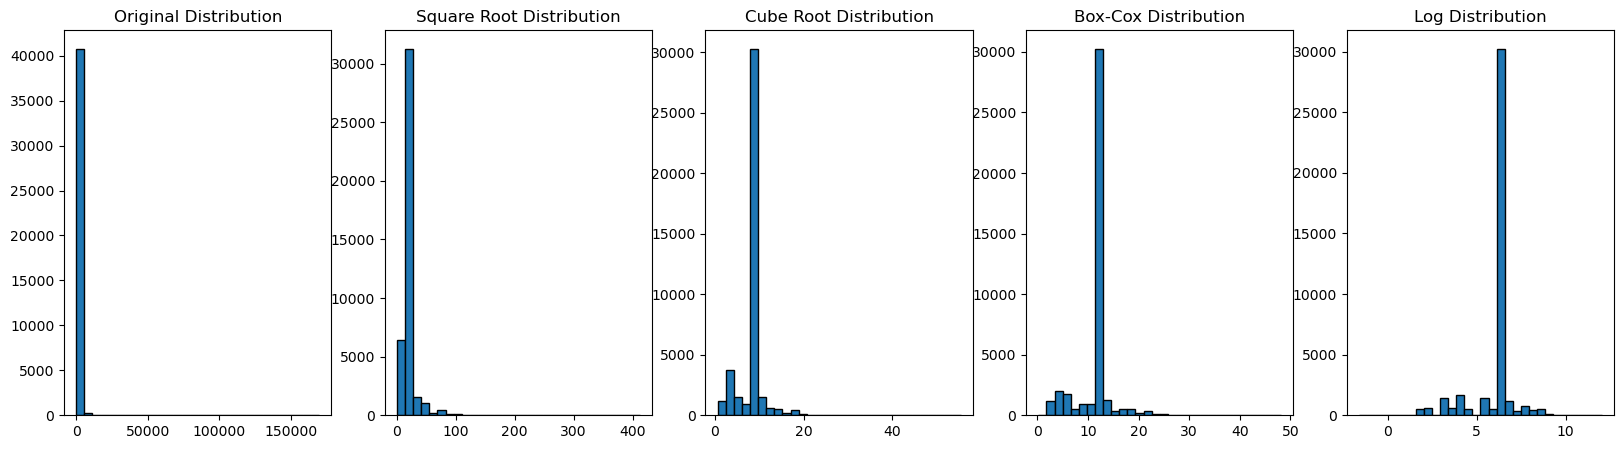

In [889]:
import scipy.stats as stats

# Assuming 'amount_tsh' is in df
df = X_train_transformed.copy()

# Function to calculate skewness
def check_skewness(col):
    return stats.skew(df[col])

# Original skewness
original_skew = check_skewness('amount_tsh')

# Square root transformation
df['amount_tsh_sqrt'] = np.sqrt(df['amount_tsh'])
sqrt_skew = check_skewness('amount_tsh_sqrt')

# Cube root transformation
df['amount_tsh_cbrt'] = np.cbrt(df['amount_tsh'])
cbrt_skew = check_skewness('amount_tsh_cbrt')

# Box-Cox transformation 
df['amount_tsh_boxcox'], lambda_boxcox = stats.boxcox(df['amount_tsh'] + 1)  
boxcox_skew = check_skewness('amount_tsh_boxcox')

# Log transformation
df['amount_tsh_log'] = np.log(df['amount_tsh'])
log_skew = check_skewness('amount_tsh_log')

# Print skewness values
print(f'Original Skewness: {original_skew}')
print(f'Square Root Skewness: {sqrt_skew}')
print(f'Cube Root Skewness: {cbrt_skew}')
print(f'Box-Cox Skewness: {boxcox_skew} (Lambda: {lambda_boxcox})')
print(f'Log Skewness: {log_skew}')

# Plot histograms to visualize
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax, col, title in zip(
    axes, 
    ['amount_tsh', 'amount_tsh_sqrt', 'amount_tsh_cbrt', 'amount_tsh_boxcox', 'amount_tsh_log'], 
    ['Original', 'Square Root', 'Cube Root', 'Box-Cox', 'Log']
):
    ax.hist(df[col], bins=30, edgecolor='black')
    ax.set_title(f'{title} Distribution')

plt.show()


From the above, we can see that box-cox corrects the data the best. Therefore we shall proceed with this.

In [890]:
# Apply Box-Cox transformation on training set and capture the lambda value
X_train_transformed['amount_tsh_boxcox'], lambda_boxcox = stats.boxcox(X_train_transformed['amount_tsh'] + 1)
boxcox_skew = check_skewness('amount_tsh_boxcox')

# Drop the original 'amount_tsh' column
X_train_transformed.drop('amount_tsh', axis=1, inplace=True)

print(f'Box-Cox Skewness: {boxcox_skew} (Lambda: {lambda_boxcox})')

Box-Cox Skewness: 0.3271753766434505 (Lambda: 0.19402421454632152)


In [891]:
# Apply the same lambda to the test set
X_test_transformed['amount_tsh_boxcox'] = stats.boxcox(X_test_transformed['amount_tsh'] + 1, lmbda=lambda_boxcox)
boxcox_skew = check_skewness('amount_tsh_boxcox')

# Drop the original 'amount_tsh' column
X_test_transformed.drop('amount_tsh', axis=1, inplace=True)

print(f'Box-Cox Skewness: {boxcox_skew} (Lambda: {lambda_boxcox})')

Box-Cox Skewness: 0.3271753766434505 (Lambda: 0.19402421454632152)


In [892]:
# Transforming construction_year using apply min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_transformed[['construction_year']] = scaler.fit_transform(X_train_transformed[['construction_year']])
X_test_transformed[['construction_year']] = scaler.transform(X_test_transformed[['construction_year']])

From the above, we can see that all our numerical columns are within -1 to 1 range. This indicates that the data is approximately symmetric to moderately skewed.

In [893]:
# Checking that we have consistency in columns in the train and test sets
X_train_transformed.columns == X_test_transformed.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [894]:
X_train_transformed

,longitude,latitude,basin,region,scheme_management,construction_year,extraction_type,water_quality,public_meeting_True,permit_True,...,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_unknown,management_group_parastatal,management_group_unknown,management_group_user-group,amount_tsh_boxcox
40554,35.371668,-4.263098,0,8,11,0.792453,3,0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12.063816
25171,34.912992,-8.954426,6,3,6,0.867925,3,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.063816
28622,36.084544,-10.921422,7,16,6,0.754717,14,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9.267818
35113,38.286935,-5.778625,5,20,6,0.188679,3,0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.880703
23503,32.107949,-8.912064,2,15,6,0.452830,4,0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.063816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29444,37.450929,-3.495127,5,6,9,0.905660,13,0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.062173
46519,36.778837,-2.556306,0,0,2,0.981132,3,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.063816
55239,34.700531,-9.107210,6,3,7,0.264151,3,0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.063816
7511,34.433609,-9.299510,1,3,6,0.132075,3,0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.063816


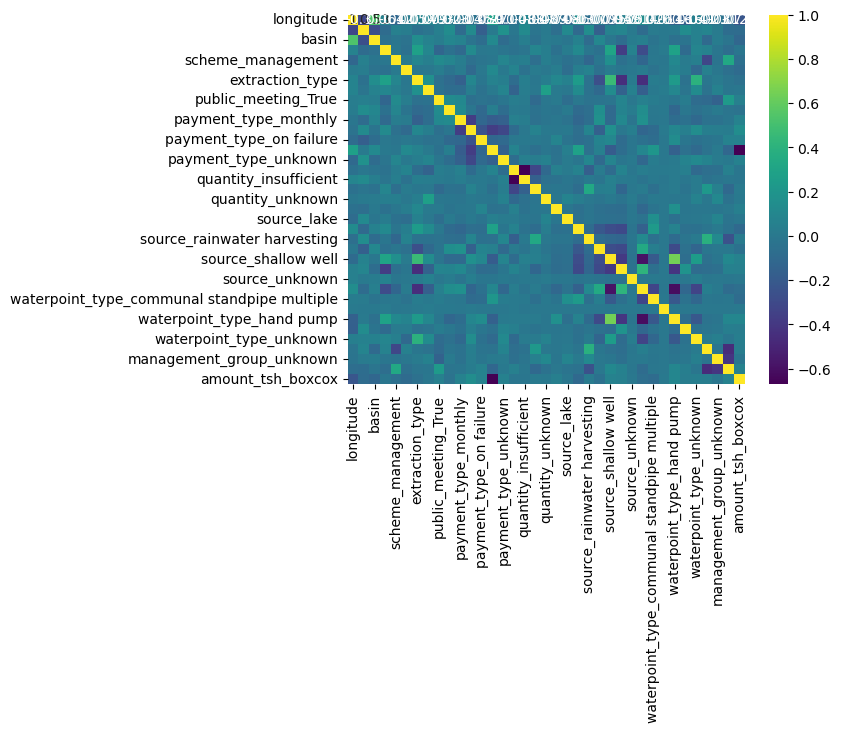

In [895]:
# Checking if we have any highly correlated features
corr = X_train_transformed.corr()
sns.heatmap(corr, annot=True, cmap="viridis")
plt.show()  

We can see that we do not haveany highly correlated columns.

## CLASSIFICATION MODELING & EVALUATION

### LOGISTIC REGRESSION

In [897]:
y_test_transformed = y_test_transformed.astype(int)

print("Class distribution in y_test:")
print(np.bincount(y_test_transformed))


Class distribution in y_test:
[3940 6347]


In [900]:
y_pred = y_pred.astype(int)
print(np.bincount(y_pred))  # Check class distribution in predictions


[3767 6520]


Model 1:
Accuracy: 0.7569
Recall: 0.8166
Precision: 0.7949
F1-score: 0.8056
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      3940
           1       0.79      0.82      0.81      6347

    accuracy                           0.76     10287
   macro avg       0.74      0.74      0.74     10287
weighted avg       0.76      0.76      0.76     10287



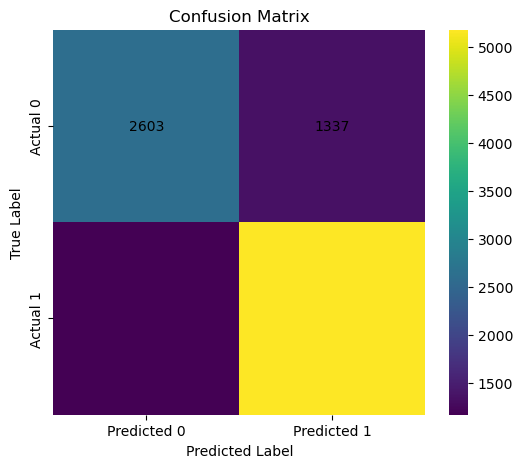

In [908]:
# Importing logistic regression and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Initializing and training the logistic regression model
logreg_model = LogisticRegression(class_weight='balanced', random_state=42)
logreg_model.fit(X_train_transformed, y_train_transformed)

# Making predictions on the test set
y_pred = logreg_model.predict(X_test_transformed)

# Evaluating the model
accuracy = accuracy_score(y_test_transformed, y_pred)
recall = recall_score(y_test_transformed, y_pred)
precision = precision_score(y_test_transformed, y_pred)
f1 = f1_score(y_test_transformed, y_pred)

print('Model 1:')
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification report
print(classification_report(y_test_transformed, y_pred))

# Computing confusion matrix
cm = confusion_matrix(y_test_transformed, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="viridis",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
             annot_kws={"color": "black"})

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [903]:
print(cm)


[[2603 1337]
 [1164 5183]]


#### INTERPRETATION
Accuracy: 0.77 indicates that this model correctly predicts 77% of the test samples.
Precision: 0.79 implies that out of all predicted non-functional cases, 79% were actually non-functional.
Recall: 0.55 show that the model only identified 55% of the actual non-functional cases.
The model is good at predicting non-functional cases when it does, but it misses a lot of actual non-functional cases.

Precision: 0.77 implies that of all predicted functional cases, 77% were actually functional.
Recall: 0.91 shows that the model correctly identified 91% of the actual functional cases.
F1-Score: 0.83 shows a strong balance between precision and recall.
The model is very good at identifying functional cases, but 23% of its functional predictions are wrong.

Let us try tuning the model further by feature selection. We will do this using recursive feature elimination.

Model with RFE:
Accuracy: 0.7572
Recall: 0.8688
Precision: 0.7681
F1-score: 0.8153

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.58      0.65      3940
         1.0       0.77      0.87      0.82      6347

    accuracy                           0.76     10287
   macro avg       0.75      0.72      0.73     10287
weighted avg       0.75      0.76      0.75     10287



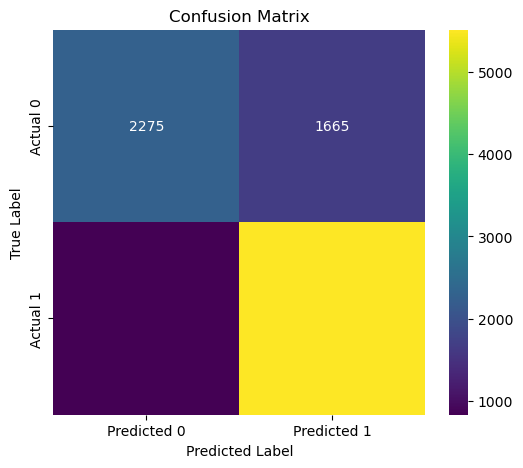


Selected Features after RFE:
 Index(['construction_year', 'quantity_enough', 'quantity_insufficient',
       'quantity_seasonal', 'quantity_unknown', 'source_lake',
       'source_rainwater harvesting',
       'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
       'waterpoint_type_unknown'],
      dtype='object')


In [809]:
# Import necessary libraries
from sklearn.feature_selection import RFE

# Initialize Logistic Regression
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=logreg, n_features_to_select=10)  # Choose top 10 features (adjust as needed)
X_train_selected = rfe.fit_transform(X_train_transformed, y_train_transformed)
X_test_selected = rfe.transform(X_test_transformed)  # Transform test set with the same selected features

# Train Logistic Regression on selected features
logreg.fit(X_train_selected, y_train_transformed)

# Predictions
y_pred = logreg.predict(X_test_selected)

# Evaluation Metrics
accuracy = accuracy_score(y_test_transformed, y_pred)
recall = recall_score(y_test_transformed, y_pred)
precision = precision_score(y_test_transformed, y_pred)
f1 = f1_score(y_test_transformed, y_pred)

print('Model with RFE:')
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test_transformed, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_transformed, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Show selected features
selected_features = X_train_transformed.columns[rfe.support_]
print("\nSelected Features after RFE:\n", selected_features)


The model leans toward predicting functional more than non-functional cases.
In an attempt to improve the recall for Class 0, let us try random forest as it has a better grasp of handling imbalanced data over logistic regression.

### RANDOM FOREST

## EVALUATION